In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Домашнее задание №1

## Извлекаем данные

In [2]:
fullData = pd.read_csv("data.csv", sep=";")
fullData

,Дата,Заражений за день,Выздоровлений за день,Смертей за день
0,2020-03-12 00:00:00,34,0,0
1,2020-03-13 00:00:00,11,0,0
2,2020-03-14 00:00:00,14,0,0
3,2020-03-15 00:00:00,4,3,0
4,2020-03-16 00:00:00,28,2,0
...,...,...,...,...
1033,2023-01-09 00:00:00,2754,2990,41
1034,2023-01-10 00:00:00,3032,5062,47
1035,2023-01-11 00:00:00,4201,5122,46
1036,2023-01-12 00:00:00,4675,4541,48


In [3]:
col = [fullData.columns[0], fullData.columns[1]]
col

['Дата', 'Заражений за день']

In [4]:
temp = [i for i in range(1, len(fullData[col[0]])+1)]
df = pd.DataFrame({col[0] : temp, col[1] : fullData[col[1]]})
df

,Дата,Заражений за день
0,1,34
1,2,11
2,3,14
3,4,4
4,5,28
...,...,...
1033,1034,2754
1034,1035,3032
1035,1036,4201
1036,1037,4675


## Строим график

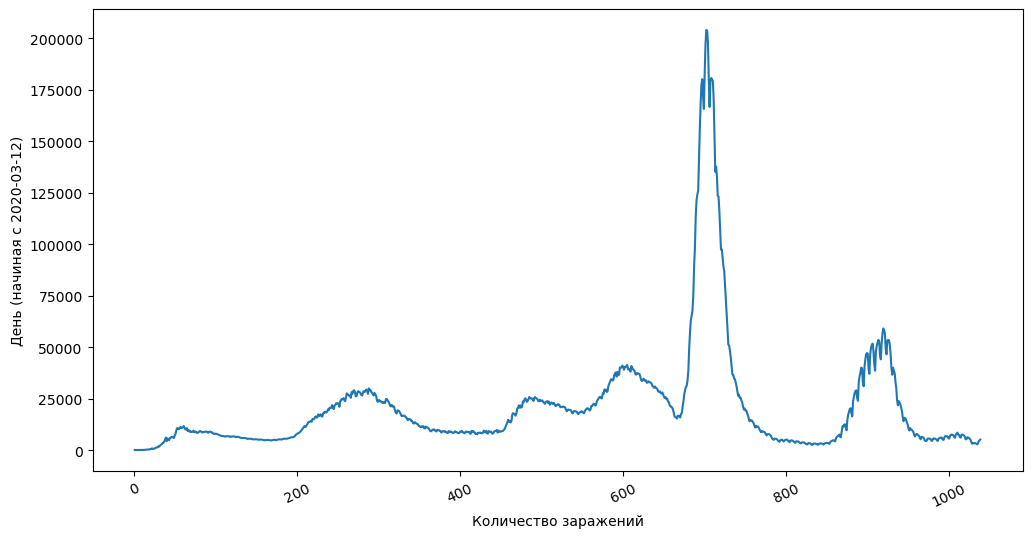

In [5]:
plt.figure(figsize = (12, 6))
plt.plot(df[col[0]], df[col[1]])
plt.xlabel("Количество заражений")
plt.ylabel("День (начиная с 2020-03-12)")
plt.xticks(rotation=25) 
plt.show()

## Расчет спектра

In [6]:
fd = 1 / len(df[col[0]])
spectrum = np.fft.fft(df[col[1]])
freqs = np.fft.fftfreq(len(spectrum), fd)
spectrum = np.fft.fftshift(spectrum)
freqs = np.fft.fftshift(freqs)

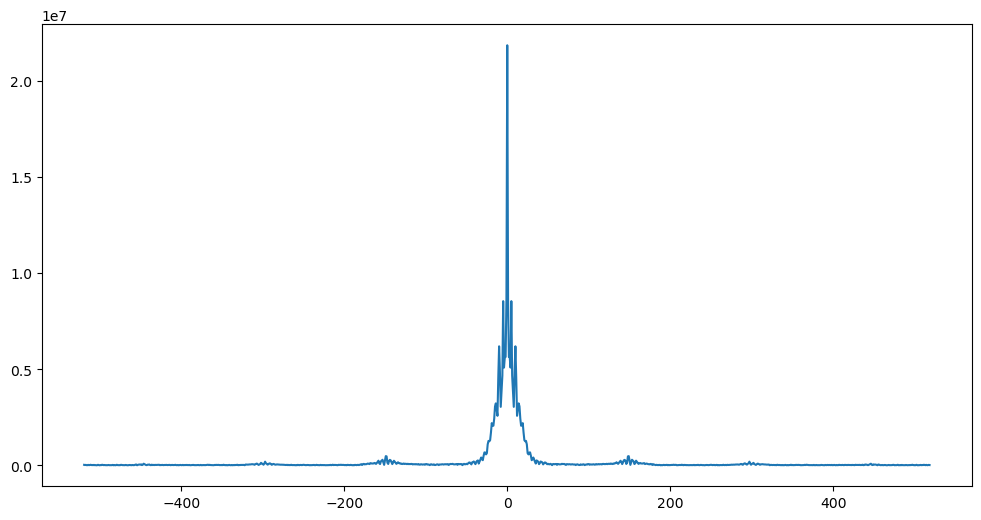

In [7]:
plt.figure(figsize = (12, 6))
plt.plot(freqs, np.abs(spectrum))

(0.0, 20.0)

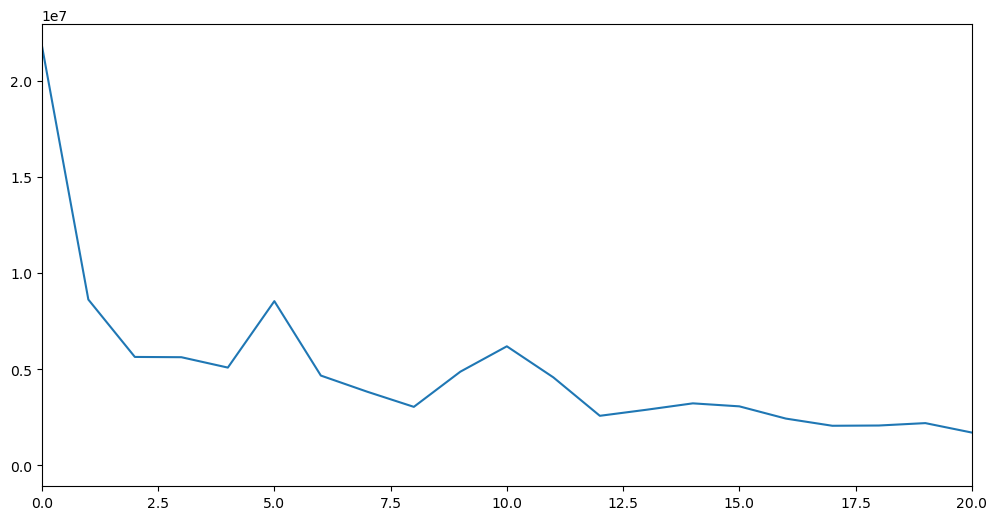

In [8]:
plt.figure(figsize = (12, 6))
plt.plot(freqs, np.abs(spectrum))
plt.xlim(0,20)

## Аппроксимация данных с помощью полинома

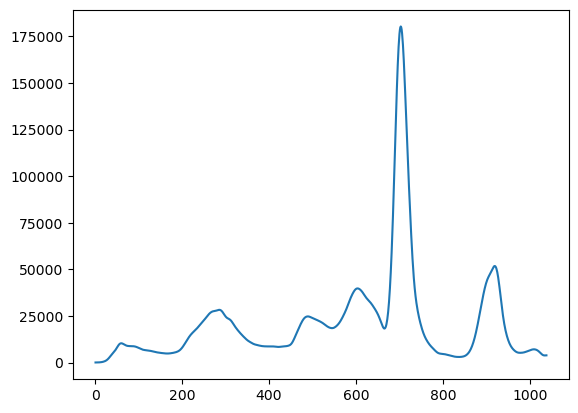

In [9]:
filtered = gaussian_filter1d(df[col[1]], 5)
plt.plot(df[col[0]], filtered)
plt.show()

In [10]:
fitX = list(df[col[0]])

In [11]:
def findFit(x, y):
    
    best_d = 3; prvErr = None
    for d in range(3, 100):
        coefs = np.polyfit(x, y, d)
        poly = np.poly1d(coefs)
        fit = poly(x)
        err = sum((fit - y)**2) / len(y)
        if prvErr == None or err < prvErr:
            best_d = d
            prvErr = err
    
    return best_d

In [12]:
findFit(df[col[0]], filtered)

/tmp/ipykernel_2921/661009334.py:5: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y, d)
/tmp/ipykernel_2921/661009334.py:5: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y, d)
/tmp/ipykernel_2921/661009334.py:5: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y, d)
/tmp/ipykernel_2921/661009334.py:5: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y, d)
/tmp/ipykernel_2921/661009334.py:5: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y, d)
/tmp/ipykernel_2921/661009334.py:5: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y, d)
/tmp/ipykernel_2921/661009334.py:5: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y, d)
/tmp/ipykernel_2921/661009334.py:5: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y, d)
/tmp/ipykernel_2921/661009334.py:5: RankWarning: Polyfit may be poorly conditioned
  coefs = np.

59

In [13]:
coefs = np.polyfit(fitX, filtered, 82)
poly = np.poly1d(coefs)
fitY = poly(fitX)

/tmp/ipykernel_2921/1764000526.py:1: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(fitX, filtered, 82)


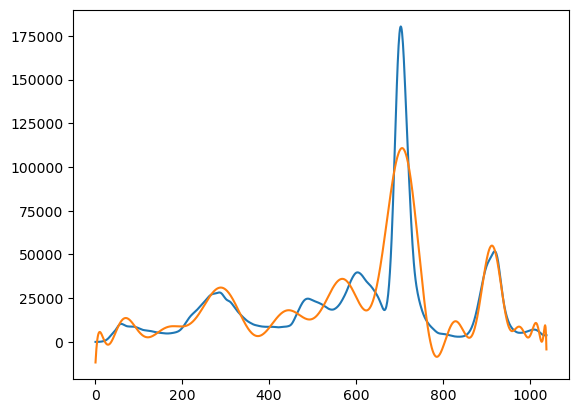

In [14]:
plt.plot(df[col[0]], filtered)
plt.plot(fitX, fitY)
plt.show()

## Ищем пики через производную

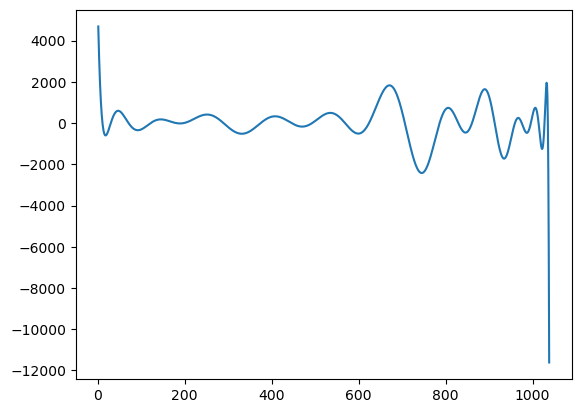

In [15]:
deriv = np.polyder(poly)
derivY = deriv(fitX)
plt.plot(fitX, derivY)
plt.show()

In [22]:
roots = np.roots(deriv)
roots

array([-987.7969474  +76.44652151j, -987.7969474  -76.44652151j,
       -964.36018498+227.6793582j , -964.36018498-227.6793582j ,
       -917.85772818+373.95075504j, -917.85772818-373.95075504j,
       -849.05403916+511.99895797j, -849.05403916-511.99895797j,
       -759.05102469+638.64782257j, -759.05102469-638.64782257j,
       -649.29291681+750.81723281j, -649.29291681-750.81723281j,
       -521.520396  +845.5255826j , -521.520396  -845.5255826j ,
       -377.72037806+919.86878949j, -377.72037806-919.86878949j,
       -220.04882998+970.95618896j, -220.04882998-970.95618896j,
        -50.69336296+995.72229769j,  -50.69336296-995.72229769j,
        128.44588646+990.47537003j,  128.44588646-990.47537003j,
        316.56296521+949.6212351j ,  316.56296521-949.6212351j ,
        517.56174853+860.39492602j,  517.56174853-860.39492602j,
       1034.88833872  +0.j        , 1027.54943185  +0.j        ,
       1013.24182893  +0.j        ,  996.17384665  +0.j        ,
        974.70873493  +0.

In [28]:
extremums = roots.real[abs(roots.imag) == 0]
extremums

array([1034.88833872, 1027.54943185, 1013.24182893,  996.17384665,
        974.70873493,  959.31019656,  912.56286554,  860.48690142,
        828.98809334,  785.96485815,  706.06954842,  623.64091556,
        568.54500178,  492.94451807,  445.35610606,  374.40948787,
        289.02186199,  197.46553628,  180.15449617,  121.36097351,
         70.59436915,   29.77942201,   10.67219139])

In [38]:
e = 1
index = list()
for i, val in enumerate(extremums):
    if poly(val-e) < poly(val) and poly(val+e):
        index.append(i)

In [47]:
fullData[col[0]][list(map(int, extremums[index]))]

1034    2023-01-10 00:00:00
1013    2022-12-20 00:00:00
974     2022-11-11 00:00:00
912     2022-09-10 00:00:00
828     2022-06-18 00:00:00
706     2022-02-16 00:00:00
568     2021-10-01 00:00:00
445     2021-05-31 00:00:00
289     2020-12-26 00:00:00
180     2020-09-08 00:00:00
70      2020-05-21 00:00:00
10      2020-03-22 00:00:00
Name: Дата, dtype: object